In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve


plt.style.use('ggplot')

In [2]:
kickstarter = pd.read_csv('kickstarter_04_25_19_ready_for_modeling.csv')

In [3]:
kickstarter.columns

Index(['id', 'slug', 'state_successful', 'goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater', 'location', 'child_category'],
      dtype='object')

In [4]:
X = kickstarter[['goal', 'staff_pick_True',
       'cam_length', 'blurb_length', 'country_US', 'main_category_comics',
       'main_category_crafts', 'main_category_dance', 'main_category_design',
       'main_category_fashion', 'main_category_film & video',
       'main_category_food', 'main_category_games', 'main_category_journalism',
       'main_category_music', 'main_category_photography',
       'main_category_publishing', 'main_category_technology',
       'main_category_theater']]
y = kickstarter['state_successful']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 101, stratify = y)
print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)

(144934, 19) (144934,)
(62115, 19) (62115,)


In [73]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
model = LogisticRegression()
param_grid = [{'penalty': ['l1','l2'],'C': [0.001,0.01,0.1,1,10,100,1000]}]
grid = GridSearchCV(model,param_grid,refit=True,verbose=2, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_scaled,y_train)
grid_predictions = grid.predict(X_test_scaled)
best_params = grid.best_params_
best_estimator = grid.best_estimator_
best_cm = confusion_matrix(y_test,grid_predictions)
best_cr = classification_report(y_test,grid_predictions)
print(best_params, best_estimator, best_cm, best_cr)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   16.6s finished
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1000, 'penalty': 'l1'} LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) [[16928 11551]
 [ 7832 25804]]               precision    recall  f1-score   support

           0       0.68      0.59      0.64     28479
           1       0.69      0.77      0.73     33636

   micro avg       0.69      0.69      0.69     62115
   macro avg       0.69      0.68      0.68     62115
weighted avg       0.69      0.69      0.69     62115



In [78]:
log_model = LogisticRegressionCV(Cs=1000, fit_intercept = True, cv = 10)
log_model.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=1000, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2',
           random_state=None, refit=True, scoring=None, solver='lbfgs',
           tol=0.0001, verbose=0)

In [79]:
predictions = log_model.predict(X_test_scaled)

In [80]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.59      0.64     28479
           1       0.69      0.77      0.73     33636

   micro avg       0.69      0.69      0.69     62115
   macro avg       0.69      0.68      0.68     62115
weighted avg       0.69      0.69      0.69     62115



In [81]:
log_loss(y_test,predictions)

10.777981830657042

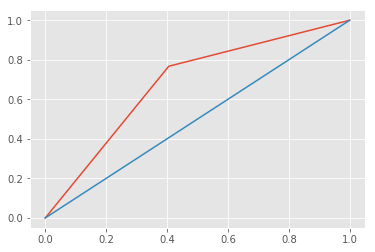

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test,predictions)
plt.plot(fpr, tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100))

In [83]:
roc_auc_score(y_test,predictions)

0.6807704911206518

In [84]:
print("Model accuracy:",metrics.accuracy_score(y_test,predictions))

Model accuracy: 0.6879497705868147


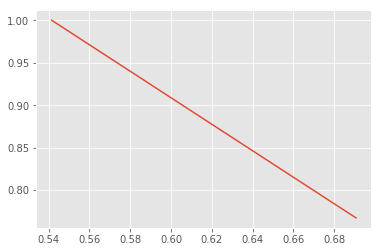

In [85]:
prec, recall, thresholds = precision_recall_curve(y_test,predictions)
plt.plot(prec[0:-1], recall[0:-1])